In [1]:
import pandas as pd
import numpy as np
import string
import re
from bs4 import BeautifulSoup
from spellchecker import SpellChecker
import matplotlib.pyplot as plt
from utils import emo
import emoji
import string
# !pip install emoji

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,text,label
0,takes no time to copy/paste a press release,0
1,You're delusional,1
2,Jazz fan here. I completely feel. Lindsay Mann...,0
3,ah i was also confused but i think they mean f...,0
4,Thank you so much. ♥️ that means a lot.,0


## Helper pre-processing functions

>In general we remove the emoticons and emoji from dataset \
but since we are working with detecting emotions so they will \
be replaced by their meanings

In [3]:
PUNCT_TO_REMOVE = string.punctuation
UNICODE_EMO = emo.UNICODE_EMOJI
EMOTICONS = emo.EMOTICONS_EMO

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
def remove_html(text):
    return BeautifulSoup(text, "lxml").text

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

#  Converting Emoticons Start

str_emo = str(EMOTICONS)[1:-1]
str_emo = str_emo.replace("\\","\\\\")
str_emo = str_emo.replace('(','\(')
str_emo = str_emo.replace(')','\)')
str_emo = str_emo.replace('[','\[')
str_emo = str_emo.replace(']','\]')
str_emo = str_emo.replace('{','\{')
str_emo = str_emo.replace('}','\}')
str_emo = str_emo.replace('.','\.')
str_emo = str_emo.replace('$','\$')
str_emo = str_emo.replace('*','\*')
ttr_emo = '{'+str_emo+'}'
mod_emo = eval(ttr_emo)

def convert_emoticons(text):
    for e,m in zip(EMOTICONS,mod_emo):
        if e in text:
            text = re.sub(m, "_".join(EMOTICONS[e].replace(",","").split()), text)
    return text

# Converting Emoticons End


def convert_emojis(text):
    return emoji.demojize(text)

In [4]:
df['text'] = df['text'].apply(lambda x: convert_emojis(x)) # converting emojis to text
df['text'] = df['text'].apply(lambda x: convert_emoticons(x)) # converting emoticons to text
df['text'] = df['text'].apply(lambda x: x.lower())   # converting data to lowecase
df['text'] = df['text'].apply(lambda x: remove_urls(x))   # converting data to lowecase
df["text"] = df["text"].apply(lambda x: remove_punctuation(x)) # removing unwanted characters

<BarContainer object of 2 artists>

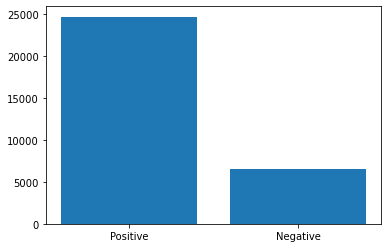

In [32]:
plt.figure(figsize=(6, 4))
plt.bar(['Positive','Negative'],list(df.label.value_counts()))